In [1]:
import math
import numpy as np

# importing Qiskit
import qiskit as q
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector

# import basic plot tools
from qiskit.visualization import plot_histogram

# Loading your IBM Quantum account(s)
IBMQ.save_account("TOKEN", overwrite= True)
provider = IBMQ.load_account()

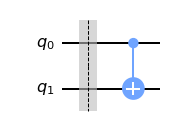

In [2]:
balanced_oracle = QuantumCircuit(2)
balanced_oracle.barrier()
balanced_oracle.cx(0, 1)
balanced_oracle.draw("mpl")

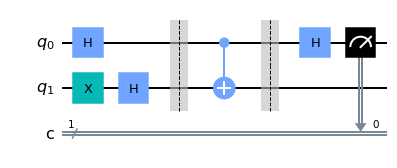

In [3]:
circuit = QuantumCircuit(2, 1)
circuit.h(0)
circuit.x(1)
circuit.h(1)
circuit.compose(balanced_oracle, inplace= True)
circuit.barrier()
circuit.h(0)
circuit.measure([0], [0])
circuit.draw("mpl")

In [4]:
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (2) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_belem


In [ ]:
from qiskit.tools.monitor import job_monitor

transpiled_dj_circuit = transpile(circuit, backend, optimization_level=3)
job = backend.run(transpiled_dj_circuit)
job_monitor(job, interval=2)

Job Status: job is actively running

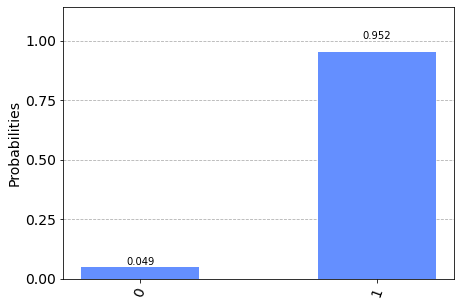

In [6]:
results = job.result()
answer = results.get_counts()

plot_histogram(answer)